**Previous:** [Part 2 - Data Cleaning](Part%202%20-%20Data%20Cleaning.ipynb)

<img src='http://imgur.com/1ZcRyrc.png' style='float: left; margin: 20px; height: 55px'>

# Project 3: Reddit Webscraping

## Part 3 - Exploratory Data Analysis (EDA)

---
## Contents
---

### [Part 1 - Web Scraping](Part%201%20-%20Web%20Scraping.ipynb)
1. Introduction
2. Import - Web Scraping using PRAW

### [Part 2 - Data Cleaning](Part%202%20-%20Data%20Cleaning.ipynb)
1. Import
2. Cleaning - Data Frame and Text

### [Part 3 - Exploratory Data Analysis (EDA)](Part%203%20-%20Exploratory%20Data%20Analysis%20(EDA).ipynb)
1. [Import](#1.-Import)
2. [Exploratory Data Analysis - Trends](#2.-Exploratory-Data-Analysis---Trends)
3. [Exploratory Data Analysis - Unigrams](#3.1-Unigrams)
4. [Exploratory Data Analysis - Bigrams](#4.1-Bigrams)
5. [Exploratory Data Analysis - Trigrams](#5.1-Trigrams)

### [Part 4 - Pre-processing & Modelling](Part%204%20-%20Pre-processing%20&%20Modelling.ipynb)
1. Import
2. Pre-processing - Binarizing The 2 Classes, Train-test Split
3. Modelling - Feature Engineering, Comparing Against Other Models
4. Conclusion - Summary, Recommendations

---
## 1. Import
---
### 1.1 Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import ast

In [5]:
# Set display options
pd.set_option('display.max_colwidth', None)

### 1.2 Cleaned Data

In [6]:
# Import data saved in previous notebook (Part 2)
reddit = pd.read_csv('reddit_cleaned_final.csv')

reddit.head()

,score,total_comments,subreddit,post_type,time_uploaded,title_&_text,title_text_stemmed,title_text_lemmatized,stemmed_round_1,lemmatized_round_1,stemmed_round_2,lemmatized_round_2,stemmed_round_3,lemmatized_round_3
0,1,0,intermittentfasting,new,26/9/23 7:57,Does taking flavoured creatine break a fast Taking one scoop roughly 3g It has sucralose sweetener,"['take', 'flavour', 'creatin', 'break', 'fast', 'take', 'scoop', 'roughli', '3g', 'sucralos', 'sweeten']","['taking', 'flavoured', 'creatine', 'break', 'fast', 'taking', 'scoop', 'roughly', '3g', 'sucralose', 'sweetener']","['take', 'flavour', 'creatin', 'break', 'fast', 'take', 'one', 'scoop', 'roughli', '3g', 'sucralos', 'sweeten']","['taking', 'flavoured', 'creatine', 'break', 'fast', 'taking', 'one', 'scoop', 'roughly', '3g', 'sucralose', 'sweetener']","['take', 'flavour', 'creatin', 'break', 'fast', 'take', 'one', 'scoop', 'roughli', '3g', 'sucralos', 'sweeten']","['taking', 'flavoured', 'creatine', 'break', 'fast', 'taking', 'one', 'scoop', 'roughly', '3g', 'sucralose', 'sweetener']","['take', 'flavour', 'creatin', 'break', 'fast', 'take', 'one', 'scoop', 'roughli', '3g', 'sucralos', 'sweeten']","['taking', 'flavoured', 'creatine', 'break', 'fast', 'taking', 'one', 'scoop', 'roughly', '3g', 'sucralose', 'sweetener']"
1,6,1,intermittentfasting,new,26/9/23 7:46,I lost 120 lbsshe lost 80 One meal a day from here on,"['120', 'lbsshe', '80', 'meal', '']","['120', 'lbsshe', '80', 'meal', '']","['lost', '120', 'lbsshe', 'lost', '80', 'one', 'day', '']","['lost', '120', 'lbsshe', 'lost', '80', 'one', 'day', '']","['lost', '120', 'lbsshe', 'lost', '80', 'one', 'meal', 'day', '']","['lost', '120', 'lbsshe', 'lost', '80', 'one', 'meal', 'day', '']","['lost', '120', 'lbsshe', 'lost', '80', 'one', 'meal', 'day', '']","['lost', '120', 'lbsshe', 'lost', '80', 'one', 'meal', 'day', '']"


> <font size = 3 color = "crimson"> Same comment regarding the missing csv files. I am not going to run this as I know it is not present.</font>

## Data Dictionary

| Column                             | Datatype  | Explanation                                           |
| ---------------------------------- | --------- | ----------------------------------------------------- |
| **title**                          | object    | Title of the Reddit post                              |
| **post_text**                      | object    | Text content of the Reddit post                       |
| **id**                             | object    | Unique identifier for the post                        |
| **score**                          | int64     | Score or upvotes of the post                          |
| **total_comments**                 | int64     | Total number of comments on the post                  |
| **post_url**                       | object    | URL of the post                                       |
| **subreddit**                      | object    | Subreddit where the post was made                     |
| **post_type**                      | object    | Type or format of the post                            |
| **time_uploaded**                  | object    | Timestamp when the post was uploaded                  |
| **title_&_text**                   | object    | Title and text content with punctuations removed      |
| **title_text_stemmed**             | object    | Title and text content after stemming                 |
| **title_text_lemmatized**          | object    | Title and text content after lemmatization            |
| **stemmed_round_1**                | object    | Stemmed title and text after 1st round of feature engineering|
| **lemmatized_round_1**             | object    | Lemmatized title and text after 1st round of feature engineering|
| **stemmed_round_2**                | object    | Stemmed title and text after 2nd round of feature engineering|
| **lemmatized_round_2**             | object    | Lemmatized title and text after 2nd round of feature engineering|
| **stemmed_round_3**                | object    | Stemmed title and text after 3rd round of feature engineering|
| **lemmatized_round_3**             | object    | Lemmatized title and text after 3rd round of feature engineering|

---
## 2. Exploratory Data Analysis - Trends
---
### 2.1 Overview of Data:

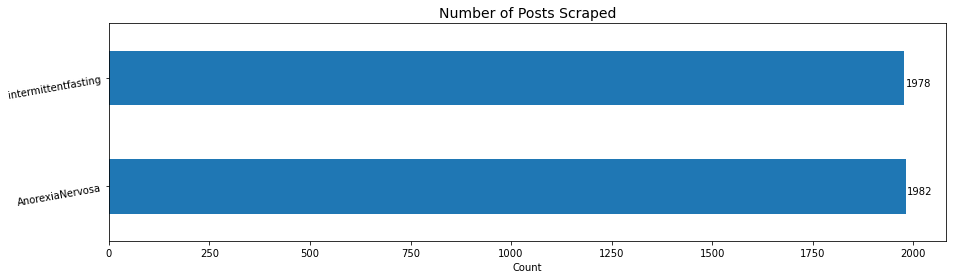

In [8]:
# Plot total number of posts for each subreddit
subreddit_count = reddit['subreddit'].value_counts()

ax = subreddit_count.plot(kind='barh', figsize=(15,4))
plt.title('Number of Posts Scraped', fontsize=14)
plt.xlabel('Count', fontsize=10)
ax.set_yticklabels(subreddit_count.index, rotation=10) 

for i, v in enumerate(subreddit_count):
    ax.text(v + 3, i, str(v), va='top', fontsize=10)

**Analysis**: The cleaned dataset has approximately equal posts scraped for each class - i.e. r/intermittentfasting and r/AnorexiaNervosa. We will proceed to examine the data.

### 2.2 Analysis of Text Length - Word Count and Character Count

In [9]:
# Create new features measuring character count and word count for entire dataset
df['word_count'] = df['punctuation_removed_title_and_text'].apply(lambda x: len(x.split()))
df['char_count']= df['punctuation_removed_title_and_text'].apply(lambda x: len(x))

In [10]:
# Separate posts for different subreddits
IF_posts = df[df['subreddit']=='intermittentfasting']
AN_posts = df[df['subreddit']=='AnorexiaNervosa']

### 2.2.1 Analysing Word Count Statistics

In [11]:
# Get descriptive stats for word counts
word_count_stats = {'Both Subreddits': reddit.word_count.describe().round(2),
                    'Intermittent Fasting': IF_posts.word_count.describe().round(2),
                    'Anorexia Nervosa': AN_posts.word_count.describe().round(2)
                   }

pd.DataFrame(word_count_stats).transpose()

,count,mean,std,min,25%,50%,75%,max
Both Subreddits,3960.0,88.04,104.01,0.0,20.0,54.0,118.0,1728.0
Intermittent Fasting,1978.0,61.60,77.83,1.0,15.0,35.0,77.0,975.0
Anorexia Nervosa,1982.0,114.42,119.09,0.0,34.0,82.0,158.0,1728.0


### 2.2.2 Analysing Character Count Statistic

In [12]:
# Get descriptive stats for char counts
char_count_stats = {
    'Both Subreddits': df.char_count.describe().round(2),
    'Intermittent Fasting': IF_posts.char_count.describe().round(2),
    'Anorexia Nervosa': AN_posts.char_count.describe().round(2)}

pd.DataFrame(char_count_stats).transpose()

,count,mean,std,min,25%,50%,75%,max
Both Subreddits,3960.0,449.43,533.53,1.0,102.00,278.0,601.00,9264.0
Intermittent Fasting,1978.0,316.22,403.02,4.0,79.00,175.0,401.00,5021.0
Anorexia Nervosa,1982.0,582.37,609.40,1.0,174.25,418.0,804.75,9264.0


**Analysis for Word Count and Character Count:**
- Both subreddits show high variance in word count, given the high standard deviation of 104. 
- r/AnorexiaNervosa has higher variance as the subreddit with the post with the lowest min word count (0 words) and highest max word count (1728 words).
- The post with the highest max word count in r/intermittentfasting (975 words) is nearly half that of the highest max word count from r/AnorexiaNervosa.
- Similar trends in variance, min and max are observed in the character counts. This is expected as character counts are related to the word count. **Hence, we will focus on the word counts only for the remaining analysis on text length**.

> <font size = 3 color = "crimson"> Would be good to show some visualisations here. For example a histogram showing their relative word counts.</font>

### 2.2.3 Treatment of Outliers in Word Count

In [70]:
# Calculate the interquartile range (IQR)
Q1_wc = df['word_count'].quantile(0.25)
Q3_wc = df['word_count'].quantile(0.75)
IQR_wc = Q3_wc - Q1_wc

# Define lower and upper bounds for outliers
lower_bound_wc = Q1_wc - 1.5 * IQR_wc
upper_bound_wc = Q3_wc + 1.5 * IQR_wc

print(f'Lower Bound: {round(lower_bound_wc)} words, Upper Bound: {round(upper_bound_wc)} words')

Lower Bound: -127 words, Upper Bound: 265 words


**Note**: Given that word count cannot be negative, we will treat the lower bound as 0

In [71]:
len_outliers = df[(df['word_count'] == 0) | (df['word_count'] > upper_bound_wc)]

print(f'r/IntermittentFasting: Based on word count, {len_outliers[len_outliers['subreddit']=='intermittentfasting'].shape[0]} of {IF_posts.shape[0]} posts are outliers.')
print(f'r/AnorexiaNervosa: Based on word count, {len_outliers[len_outliers['subreddit']=='AnorexiaNervosa'].shape[0]} of {AN_posts.shape[0]} posts are outliers.')

r/IntermittentFasting: Based on word count, 46 of 1978 posts are outliers.
r/AnorexiaNervosa: Based on word count, 179 of 1982 posts are outliers.


In [72]:
# Filter both subreddits to remove outliers
ol_df = df[(df['word_count'] > 0) & (df['word_count']<(round(upper_bound_wc)))]
ol_IF = IF_posts[(IF_posts['word_count'] > 0) & (IF_posts['word_count']<upper_bound_wc.round())]
ol_AN = AN_posts[(AN_posts['word_count'] > 0) & (AN_posts['word_count']<upper_bound_wc.round())]

### 2.2.4 Distribution of Text Length

**Note**: Outlier values have been removed before plotting the chart below.

Text(0.5, 1.0, 'Distribution of Text Length')

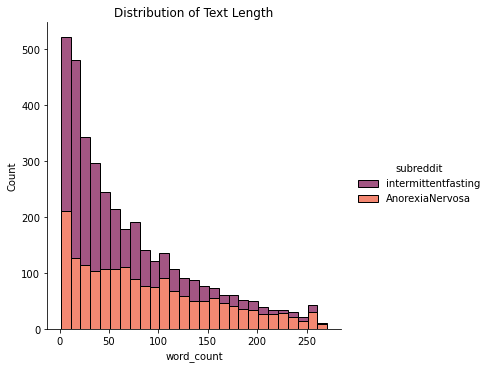

In [73]:
# Plot distribution of text length for both subreddits
sns.displot(ol_reddit, x='word_count', binwidth=10, palette='rocket',hue='subreddit',multiple='stack')

# Add a title to the plot
plt.title('Distribution of Text Length')

**Analysis for Distribution of Text Length:**  
- For both sub-reddits most posts are between 10-50 words in length.
- As seen from the right-skew in the distribution, posts in r/intermittentfasting tend to have fewer words than that of r/AnorexiaNervosa

> <font size = 3 color = "crimson"> Okay this is the kind of visualisation I meant above. But now this order is a bit confusing to me as I don't really see the difference between this and the previous word count/character count analysis section.</font>

### 2.2.5 Upper Outliers for Text Length

In [74]:
# Filter for the upper bound outliers
up_ol_df = df[df['word_count']>upper_bound_wc.round()]

Text(0.5, 1.0, 'Distribution of Text Length - Upper Outliers')

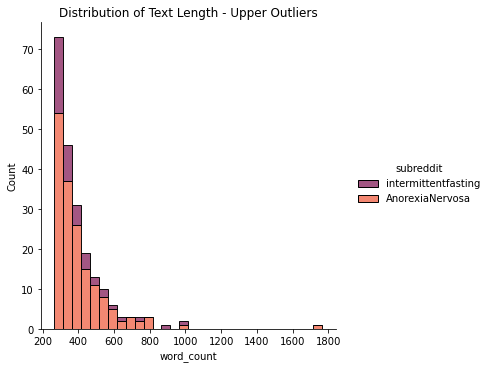

In [75]:
# Plot distribution of text length (upper outliers) for both sub-reddits
sns.displot(up_ol_df, x='word_count',binwidth=50, palette='rocket',hue='subreddit',multiple='stack')

# Add a title to the plot
plt.title('Distribution of Text Length - Upper Outliers')

**Analysis for Distribution of Text Length (Upper Outliers):**
- Similar to the analysis for text length, there are few posts from r/intermittentfasting in the upper outliers
- On the extreme high end of titles and posts exceeding 800 words, there are approximately equal number of posts from both subreddits

---
## 3. Exploratory Data Analysis
### 3.1 Unigrams
---
### 3.1.1 Comparing words in stemming vs lemmatizing

In [19]:
# Custom function to identify top 100 unigrams
def top_unigram(df,title):
    cv = CountVectorizer()
    vector = cv.fit_transform(df[title])
    vector_df = pd.DataFrame(vector.toarray(),columns=[cv.get_feature_names_out()])
    vector_freq = vector_df.sum(axis=0) 
    vector_freq = pd.DataFrame({'term':cv.get_feature_names_out(),'freq':vector_freq})
    top100 = vector_freq.sort_values(by='freq',ascending=False)[0:100]
    return top100.reset_index(drop=True)

In [20]:
# Apply custom function to stemmed and lemmatized text from each subreddit
IF_unigram_S = top_unigram(IF_posts,'title_text_stemmed')
IF_unigram_L = top_unigram(IF_posts,'title_text_lemmatized')
AN_unigram_S = top_unigram(AN_posts,'title_text_stemmed')
AN_unigram_L = top_unigram(AN_posts,'title_text_lemmatized')

In [21]:
# Compare unigrams derived from stemmed and lemmatized text
unigram_df = {'Intermittent Fasting (Stemmed)': IF_unigram_S['term'],
'Intermittent Fasting (Lemmatized)': IF_unigram_L['term'],
    'Anorexia Nervosa (Stemmed)': AN_unigram_S['term'],
    'Anorexia Nervosa (Lemmatized)': AN_unigram_L['term']}

pd.DataFrame(unigram_df)[0:10]

,Intermittent Fasting (Stemmed),Intermittent Fasting (Lemmatized),Anorexia Nervosa (Stemmed),Anorexia Nervosa (Lemmatized)
0,fast,fasting,cant,cant
1,week,fast,look,ed
2,hour,week,ed,anorexia
3,work,hour,anorexia,people
4,lb,lb,peopl,recovery
5,start,168,recoveri,thing
6,168,pound,thing,never
7,lose,year,gain,look
8,pound,meal,recov,else
9,year,work,disord,hate


**Analysis for Unigrams (Stemmed vs Lemmatized):** 
- We see that stemming produces better difference in the processed words. For example, the top 2 lemmatized unigrams are **fast** and **fasting**. Hence, we will primarily use stemming for farther processing of text.

> <font size = 3 color = "crimson"> Would be good to show the difference before and after stemming, perhaps with one example sentence/post.</font>

### 3.1.2 Visualising Top Unigrams

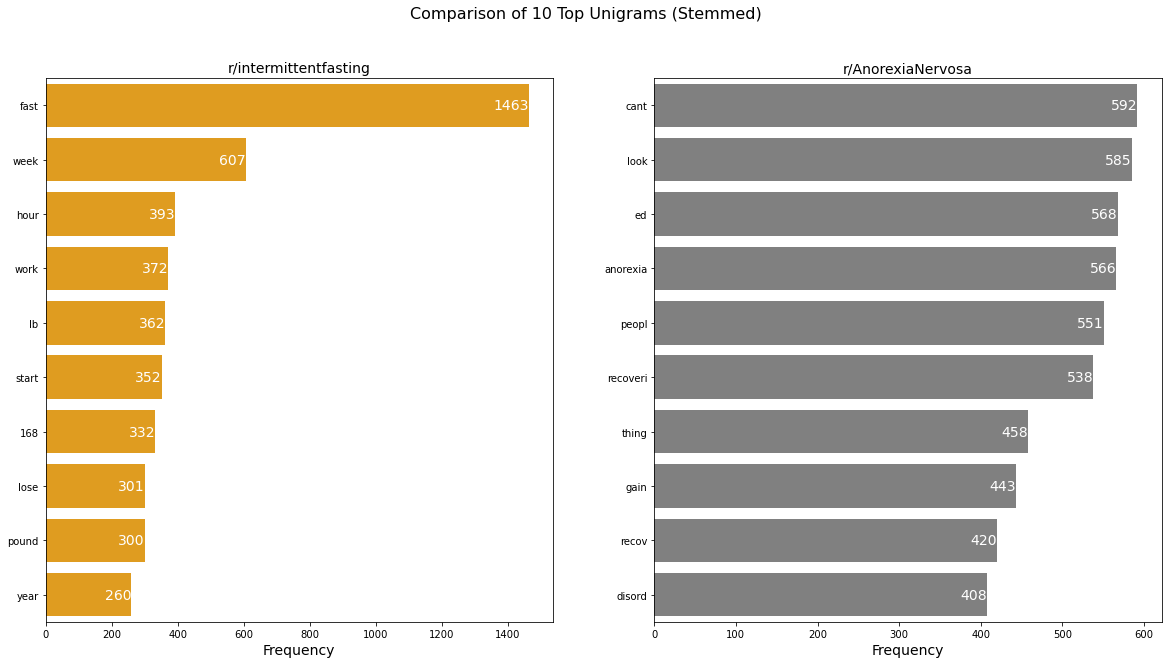

In [22]:
# Plot top 10 stemmed unigrams
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot the top common words before removing stop words
sns.barplot(data=IF_unigram_S[0:10] , y='term', x='freq', color='orange', ax=axes[0])
axes[0].set_ylabel(None, fontsize=14)
axes[0].set_xlabel('Frequency', fontsize=14)
axes[0].set_title('r/intermittentfasting',fontsize=14)


# Plot the top common words before removing stop words
sns.barplot(data=AN_unigram_S[0:10], y='term', x='freq', color='grey', ax=axes[1])
axes[1].set_ylabel(None, fontsize=14)
axes[1].set_xlabel('Frequency', fontsize=14)
axes[1].set_title('r/AnorexiaNervosa',fontsize=14)

# Add data labels (values) to the bars
def add_data_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='right', va='center',fontsize=14, color='white')
# Add data labels to both subplots
add_data_labels(axes[0])
add_data_labels(axes[1])

# Add an overall title for all four plots
fig.suptitle('Comparison of 10 Top Unigrams (Stemmed)', fontsize=16)

plt.show()

**Analysis for Top Unigrams :**  
- **r/intermittentfasting**: The top word is largely related to the act of fasting. Other notable trends include words related to measurement of time - e.g. week, hour, year
- **r/AnorexiaNervosa**: Top words are make clear references to recovery or experiences of disordered eating/behaviour - e.g. ed, anorexia, recoveri

> <font size = 3 color = "crimson"> Would have been good to flag out things like '168' and explained what that meant since to someone who knows nothing about intermittent fasting that would seem like a nonsense number in the middle of words.</font>

### 3.2 Creating Stop Words from Unigrams
### 3.2.1 Round 1

**Note**:
We will proceed to compare the 100 top unigrams (stemmed) across both subreddits to identify words that are particular to each subreddit:

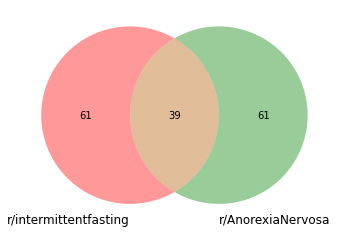

In [24]:
# Check number of common words in the top 100 unigrams
common_words = list(set(IF_unigram_S['term'].tolist()).intersection(set(AN_unigram_S['term'].tolist())))

venn2([set(IF_unigram_S['term']),set(AN_unigram_S['term'])],('r/intermittentfasting','r/AnorexiaNervosa'))

In [32]:
# Retrieve common words
print(common_words)

['gain', 'long', 'work', 'could', 'use', 'everyon', 'look', 'right', 'lose', 'get', 'els', 'say', 'thank', 'comment', 'tri', 'peopl', 'didnt', 'littl', 'ago', 'thought', 'life', 'year', 'end', 'never', 'week', 'start', 'around', 'stop', 'meal', 'without', 'love', 'thing', 'cant', 'hope', 'sure', 'normal', 'post', 'alway', 'past']


> <font size = 3 color = "crimson"> Any comments about these common words? Analysis as to why both these groups mention these words a lot or maybe difficulties in classifying? This venn diagram is also not the most meaningful as I cannot see what these words are. Maybe comment on the proportion and why you think (for example) it is a very big overlap and this needs to be dealt with.</font>

### 3c. Round 2 - Creating Stop Words from Unigrams

**Note**:
We will repeat the process of stopword removal by additional common words from the top 100 unigrams generated from the cleaned text:

In [26]:
# Define custom function to convert string data to list - based on the state of data
def string_to_list(text):
    result = ast.literal_eval(text)
    return result

In [27]:
# Define custom function to remove common words - where input is a list, based on the data
def remove_common (text):
    no_common = [word for word in text if word not in common_words]
    return ' '.join(no_common)

In [ ]:
# Apply both custom functions to remove first set of common words
IF_posts['no_common'] = IF_posts['title_text_stemmed'].apply(string_to_list).apply(remove_common)
AN_posts['no_common'] = AN_posts['title_text_stemmed'].apply(string_to_list).apply(remove_common)

In [33]:
# Retrieve top 100 unigrams for the cleaned text (common words removed)
re_IF_unigram_S = top_unigram(IF_posts,'no_common')
re_AN_unigram_S = top_unigram(AN_posts,'no_common')

In [34]:
# Compare original top 10 unigrams with new top 10 unigrams (common words removed)
re_unigram_df = {
    'Intermittent Fasting (original)': IF_unigram_S['term'],
'Intermittent Fasting (removed)': re_IF_unigram_S['term'],
    'Anorexia Nervosa (original)': AN_unigram_S['term'],
    'Anorexia Nervosa (removed)': re_AN_unigram_S['term']}

pd.DataFrame(re_unigram_df)[0:10]

,Intermittent Fasting (original),Intermittent Fasting (removed),Anorexia Nervosa (original),Anorexia Nervosa (removed)
0,fast,fast,cant,ed
1,week,hour,look,anorexia
2,hour,lb,ed,recoveri
3,work,168,anorexia,recov
4,lb,pound,peopl,disord
5,start,intermitt,recoveri,make
6,168,omad,thing,hate
7,lose,goal,gain,restrict
8,pound,loss,recov,bad
9,year,progress,disord,ill


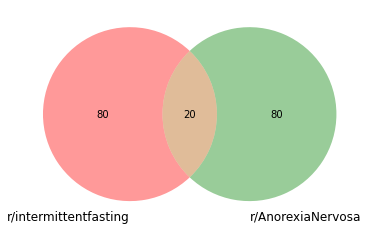

In [44]:
# Check number of new common words in the top 100 unigrams in new list (common words removed)
common_words_2 = list(set(re_IF_unigram_S['term'].tolist()).intersection(set(re_AN_unigram_S['term'].tolist())))

venn2([set(re_IF_unigram_S['term']),set(re_AN_unigram_S['term'])],('r/intermittentfasting','r/AnorexiaNervosa'))

In [47]:
# Retrieve common words (second round)
print(common_words_2)

# Extend the common_words list with second list of common words
common_words.extend(common_words_2)

['advic', 'want', 'actual', 'healthi', 'anyth', 'pretti', 'hard', 'make', 'notic', 'went', 'felt', 'id', 'time', 'find', 'ill', 'come', 'almost', 'period', 'two', 'made']


> <font size = 3 color = "crimson"> Similar to the above, any comments on the changes to the ratio of common words? And comments on the common words themselves? And once again I feel like the words being removed are actually quite interesting in terms of telling you what people are talking about. Is the ability to classify really damaged if you leave these in? Just interesting to know if they really make such a huge difference.</font>

### 3.2.3 Round 3 

**Note**:
We will repeat the process of stopword removal a third time by generating a last set of common words from the top 100 unigrams generated from the cleaned text:

In [48]:
# Define custom function to remove common words - where input is a string, based on the data
def remove_common_2 (text):
    text = text.split()
    no_common = [word for word in text if word not in common_words]
    return ' '.join(no_common)

In [49]:
# Remove common words from cleaned text (common words removed once)
IF_posts['no_common_2'] = IF_posts['no_common'].apply(remove_common_2)
AN_posts['no_common_2'] = AN_posts['no_common'].apply(remove_common_2)

/var/folders/jz/qcwfx1nj09v3vnhrlf56x74c0000gn/T/ipykernel_23152/3462669912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IF_posts['no_common_2'] = IF_posts['no_common'].apply(remove_common_2)
/var/folders/jz/qcwfx1nj09v3vnhrlf56x74c0000gn/T/ipykernel_23152/3462669912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AN_posts['no_common_2'] = AN_posts['no_common'].apply(remove_common_2)


In [51]:
# Compare original top 10 unigrams with new top 10 unigrams (common words removed twoce)
re_IF_unigram_S_2 = top_unigram(IF_posts,'no_common_2')
re_AN_unigram_S_2 = top_unigram(AN_posts,'no_common_2')

In [54]:
# Compare original top 10 unigrams with new top 10 unigrams (common words removed twice)
re_unigram_df_2 = {
    'Intermittent Fasting (original)': IF_unigram_S['term'],
'Intermittent Fasting (removed twice)': re_IF_unigram_S_2['term'],
    'Anorexia Nervosa (original)': AN_unigram_S ['term'],
    'Anorexia Nervosa (removed twice)': re_AN_unigram_S_2['term']}

pd.DataFrame(re_unigram_df_2)[0:10]

,Intermittent Fasting (original),Intermittent Fasting (removed twice),Anorexia Nervosa (original),Anorexia Nervosa (removed twice)
0,fast,fast,cant,ed
1,week,hour,look,anorexia
2,hour,lb,ed,recoveri
3,work,168,anorexia,recov
4,lb,pound,peopl,disord
5,start,intermitt,recoveri,hate
6,168,omad,thing,restrict
7,lose,goal,gain,bad
8,pound,loss,recov,fuck
9,year,progress,disord,tell


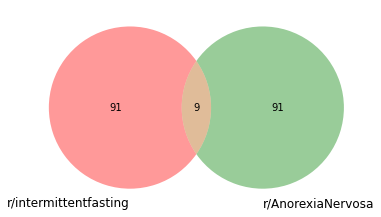

In [55]:
# Check number of new common words in the top 100 unigrams in new list (common words removed twice)
common_words_3 = list(set(re_IF_unigram_S_2['term'].tolist()).intersection(set(re_AN_unigram_S_2['term'].tolist())))

venn2([set(re_IF_unigram_S_2['term']),set(re_AN_unigram_S_2['term'])],('r/intermittentfasting','r/AnorexiaNervosa'))

In [126]:
# Retrieve all common words (third round)
print (common_words_3)

# Extend the common_words list with third list of common words
common_words.extend(common_words_3)

['less', 'experi', 'enough', 'happi', 'that', 'mayb', 'etc', 'sometim', 'hungri']


> <font size = 3 color = "crimson"> In my view this book and the cleaning book should have been combined into one. It makes more sense to go through the EDA and therefore explain why these were words we ultimately chose to take out, and then at the end of this notebook produce the 'final' cleaned csv. At present your cleaning notebook lacks context.</font>

---
## 4. Exploratory Data Analysis
### 4.1 Bigrams
---
### 4.1.1 Visualising Top Bigrams

**Note**:
We will proceed to compare the 100 top bigrams (stemmed) across both subreddits to identify patterns in words that are appearing together:

In [109]:
# Custom function to identify common words
def top_bigram (df,title):
    cv = CountVectorizer(ngram_range=(2,2))
    vector = cv.fit_transform(df[title])
    vector_df = pd.DataFrame(vector.toarray(),columns=[cv.get_feature_names_out()])
    vector_freq = vector_df.sum(axis=0) 
    vector_freq = pd.DataFrame({'term':cv.get_feature_names_out(),'freq':vector_freq})
    top100 = vector_freq.sort_values(by='freq',ascending=False)[0:100]
    return top100.reset_index(drop=True)

In [110]:
# Apply custom function to stemmed and lemmatized text from each subreddit
IF_bigram_S = top_bigram(IF_posts,'title_text_stemmed')
AN_bigram_S = top_bigram(AN_posts,'title_text_stemmed')

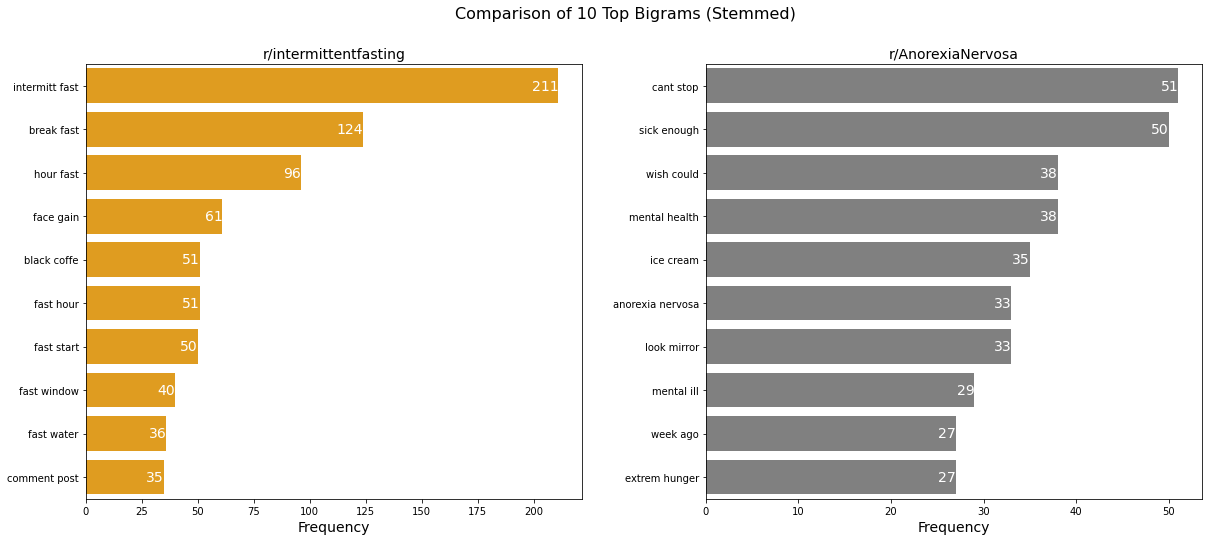

In [113]:
# Plot top 10 stemmed bigrams
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the top common words before removing stop words
sns.barplot(data=IF_bigram_S[0:10] , y='term', x='freq', color='orange', ax=axes[0])
axes[0].set_ylabel(None, fontsize=14)
axes[0].set_xlabel('Frequency', fontsize=14)
axes[0].set_title('r/intermittentfasting',fontsize=14)

# Plot the top common words before removing stop words
sns.barplot(data=AN_bigram_S[0:10] , y='term', x='freq', color='grey', ax=axes[1])
axes[1].set_ylabel(None, fontsize=14)
axes[1].set_xlabel('Frequency', fontsize=14)
axes[1].set_title('r/AnorexiaNervosa',fontsize=14)

# Add data labels (values) to the bars
def add_data_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='right', va='center',fontsize=14, color='white')

# Add data labels to both subplots
add_data_labels(axes[0])
add_data_labels(axes[1])

plt.subplots_adjust(wspace=0.25)


# Add an overall title for all four plots
fig.suptitle('Comparison of 10 Top Bigrams (Stemmed)', fontsize=16)

plt.show()

**Analysis for Top Bigrams :** 
- **r/intermittentfasting**: Similar to unigrams, top bigrams in intermittent fasting are largely related to time. Posts also could be related to the process of entering and existing fasting - e.g. break fast, fast start, fast window, etc
- **r/AnorexiaNervosa**: Top bigrams make references to one's state of being, control, and well-being - e.g. cant stop, sick enough, mental ill
- There are food types mentioned across both subreddits (e.g. black coffee, ice cream) that could be used as identifiers for each classs

In [111]:
# Created bigrams from cleaned text (common words removed twice)
re_IF_bigram_S = top_bigram(IF_posts,'no_common_2')
re_AN_bigram_S = top_bigram(AN_posts,'no_common_2')

In [112]:
# Comparing original top 10 bigrams with new top 10 bigrams (common words removed twice)

re_bigram_df = {
    'Intermittent Fasting (original)': IF_bigram_S['term'],
'Intermittent Fasting (removed twice)': re_IF_bigram_S['term'],
    'Anorexia Nervosa (original)': AN_bigram_S['term'],
    'Anorexia Nervosa (removed twice)': re_AN_bigram_S['term']}

pd.DataFrame(re_bigram_df)[0:10]

,Intermittent Fasting (original),Intermittent Fasting (removed twice),Anorexia Nervosa (original),Anorexia Nervosa (removed twice)
0,intermitt fast,intermitt fast,cant stop,sick enough
1,break fast,break fast,sick enough,mental health
2,hour fast,hour fast,wish could,ice cream
3,face gain,fast hour,mental health,anorexia nervosa
4,black coffe,black coffe,ice cream,extrem hunger
5,fast hour,fast window,anorexia nervosa,best friend
6,fast start,fast water,look mirror,hate hate
7,fast window,type fast,mental ill,high school
8,fast water,daili fast,week ago,diagnos anorexia
9,comment post,hour etc,extrem hunger,struggl anorexia


**Analysis for Bigrams  (Stopwords Removed):** 
- **r/intermittentfasting**: There is little change to the list of bigrams after removal of stopwords. This seems to suggest that the top bigrams are relatively distinctive to this class.
- **r/AnorexiaNervosa**: After removal of stopwords, the list of bigrams show a clearer focus on the discussion of the specific diagoses or struggles with anorexia, which appears 3 times in the list of top 10 bigrams.

> <font size = 3 color = "crimson"> This is good. This is the kind of thing I was talking about earlier when I mentioned having some link showing why removal of the common words might be helpful. </font>

---
## 5. Exploratory Data Analysis
### 5.1 Trigrams
---

**Note**:
We will proceed to compare the 100 top trigrams (stemmed) across both subreddits to identify patterns words that are appearing together:

In [102]:
# Custom function to identify trigrams
def top_trigram (df,title):
    cv = CountVectorizer(ngram_range=(3,3))
    vector = cv.fit_transform(df[title])
    vector_df = pd.DataFrame(vector.toarray(),columns=[cv.get_feature_names_out()])
    vector_freq = vector_df.sum(axis=0) 
    vector_freq = pd.DataFrame({'term':cv.get_feature_names_out(),'freq':vector_freq})
    top100 = vector_freq.sort_values(by='freq',ascending=False)[0:100]
    return top100.reset_index(drop=True)

In [114]:
# Applying custom function to stemmed text from each subreddit
IF_trigram_S = top_trigram(IF_posts,'title_text_stemmed')
AN_trigram_S = top_trigram(AN_posts,'title_text_stemmed')

In [115]:
# Created trigrams from cleaned text (common words removed twice)
re_IF_trigram_S = top_trigram(IF_posts,'no_common_2')
re_AN_trigram_S = top_trigram(AN_posts,'no_common_2')

In [116]:
# Comparing original top 10 trigrams with new top 10 trigrams (common words removed twice)

re_trigram_df = {
    'Intermittent Fasting (original)': IF_trigram_S['term'],
'Intermittent Fasting (removed twice)': re_IF_trigram_S['term'],
    'Anorexia Nervosa (original)': AN_trigram_S['term'],
    'Anorexia Nervosa (removed twice)': re_AN_trigram_S['term']}

pd.DataFrame(re_trigram_df)[0:10]

,Intermittent Fasting (original),Intermittent Fasting (removed twice),Anorexia Nervosa (original),Anorexia Nervosa (removed twice)
0,post throughout sort,juic smoke etc,cant stop think,diagnos anorexia nervosa
1,context fast start,sort new newer,cant stand look,tw tw tw
2,comment new sure,type fast water,diagnos anorexia nervosa,bing restrict cycl
3,comment post throughout,daili fast checkin,long stori short,hate hate hate
4,fast hour etc,fast hour etc,bing restrict cycl,your sick enough
5,hour etc hope,fast note far,thought id share,photo ice cream
6,juic smoke etc,often throughout sort,tw tw tw,mental health servic
7,share sure check,fast water juic,havent eaten anyth,low blood sugar
8,smoke etc context,concern insight share,gain signific amount,suffer anorexia nervosa
9,far concern insight,context fast etc,photo ice cream,theyr sick enough


**Analysis for Trigrams (Stopwords Removed):**
- **r/intermittentfasting**: For both the original text and text after removal of stopword, the top trigrams appear less meaningful than bigrams in any identifiable English phrases .
- **r/AnorexiaNervosa**: The top trigrams of 'cant stop think' and 'cant stand look' which could be related to control disappear after stopwords are removed. This seems to suggest that patterns of common words could be distinctive to this class, and excessive removal of stopwords may obscure this pattern. However, removal of stopwords also surface new distinctive phrases that could describe symptoms faced by persons diagnosed with anorexia - e.g. low blood sugar
- **Note**: There are 36 top trigrams for r/intermittentfasting at counts of 33 occurences each. Hence we found it less meaningful to plot the counts of top trigrams.

---
**Next:** [Part 4 - Pre-processing & Modelling](Part%204%20-%20Pre-processing%20&%20Modelling.ipynb)